# The Double Pendulum Final Problem 1

Using a Lagrangian Pendulum class we generate pendulum plots for a double pendulum using Lagrange's equations

Last revised 18-April-2023 by Tayt Armitage (armitage.44@buckeyemail.osu.edu)

# The Potential Energies

Here we begin to define the potential energies for each pendulum bob characterized by the angle they are suspended by the vertical

The first is  simple with 

$U_1 = m_1 g L_1 (1 - cos(\phi_1)$)

For the second pendulum we then need to factor in the rising of the first pendulum so 

$U_2 = m_2 g [L_1 (1-cos(\phi_1)) +  L_2 (1-cos(\phi_2))]$

giving a total potential of 

$U = (m_1 + m_2) g  L_1  (1-cos(\phi_1)) + m_2 g L_2 (1-cos(\phi_2))$

# Kinetic energy

Looking at the kinetic energy now we find that

$T_1 = \frac{1}{2} m_1 L_1^2 \dot\phi_1^2$

while the second pendulum is impacted by the kinetic energy of the first

$T_2 = \frac12 (m_1 + m_2)[L_1^2 \dot\phi_1^2 + 2 L_1 L_2 \dot\phi_1^2 \dot\phi_2^2 cos(\phi_1 - \phi_2) + L_2^2 \dot\phi_2^2]$

so the total kinetic energy is then 

$T = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 cos(\phi_1  - \phi_2) + \frac12 m_2 L_2^2 \dot\phi_2^2$

# Lagrangian 

Solving this using the lagrangian which is 
$\mathcal{L} = T - U$

$\mathcal{L} = [\frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 cos(\phi_1  - \phi_2) + \frac12 m_2 L_2^2 \dot\phi_2^2] - [(m_1 + m_2) g  L_1 (1-cos(\phi_1)) + m_2 g L_2 (1-cos(\phi_2))]$

# Euler - Lagrange equation
The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad
 m L^2 \ddot \phi = -mgL\sin\phi
  \ \mbox{or}\ \ddot\phi = - \omega_0^2\sin\phi = 0
  \;.
\end{align}$

## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 m L^2 \dot\phi^2 - mgL(1 - \cos\phi)
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi} = \frac{\partial\mathcal L}{\partial\phi}
 \quad\Longrightarrow\quad
 m L^2 \ddot \phi = -mgL\sin\phi
  \ \mbox{or}\ \ddot\phi = - \omega_0^2\sin\phi = 0
  \;.
\end{align}$

## Hamilton's equations

The generalized momentum corresponding to $\phi$ is

$\begin{align}
   \frac{\partial\mathcal{L}}{\partial \dot\phi} = m L^2 \dot\phi \equiv p_\phi
   \;.
\end{align}$

We can invert this equation to find $\dot\phi = p_\phi / m L^2$.
Constructing the Hamiltonian by Legendre transformation we find 

$\begin{align}
  \mathcal{H} &= \dot\phi p_\phi  - \mathcal{L} \\
              &= \frac{p_\phi^2}{m L^2} - \frac12 m L^2 \dot\phi^2 + mgL(1 - \cos\phi) \\
              &= \frac{p_\phi^2}{2 m L^2} + mgL(1 - \cos\phi)
              \;.
\end{align}$

Thus $\mathcal{H}$ is simply $T + V$.  Hamilton's equations are

$\begin{align}
  \dot\phi &= \frac{\partial\mathcal{H}}{\partial p_\phi} = \frac{p_\phi}{m L^2} \\
  \dot p_\phi &= -\frac{\partial\mathcal{H}}{\partial \phi} = -mgL \sin\phi 
  \;.
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [52]:
class DoublePendulum():
    """
    Double Pendulum class implements the parameters and Lagrange's equations for 
    a double pendulum, ignoring the small angle approximation.
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2: float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
   
    m1 : float
        mass of pendulum bob 1
    m2 : float 
        mass of pendulum bob 2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2 = 1., m1=1., m2 = 1.,g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta1,dt d^2theta1/dt^2, dtheta2/dt,d^2theta2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t) and y[1] = dphi1/dt
            and y[2] = phi2(t) and y[3] = dphi2/dt 
            
        Returns
        -------
        
        """
        
        phi1 = y[0]
        phi1_dot = y[1]
        phi2 = y[2]
        phi2_dot = y[3]
        
        w1 = phi1_dot
        w2 = phi2_dot
        
        phid = phi1 - phi2
        m_1 = self.m1
        m_2 = self.m2
        g_ = self.g
        l1 = self.L1
        l2 = self.L2
        denom = m_1 + m_2 * (np.sin(phid))**2
        
        w1_dot = (m_2 * g_ * np.sin(phi2) * np.cos(phid) - m_2*np.sin(phid)*(l1 * w1**2 *np.cos(phid) + l2 * w2**2) 
                - (m_1 + m_2) * g_ * np.sin(phi1)) / (l1 * denom)
        
        w2_dot = ((m_1 + m_2) * (l1 * w1**2 * np.sin(phid) - g_ * np.sin(phi2) + g_ * np.sin(phi1) * np.cos(phid)) + 
                 m_2 * l2 * w2**2 * np.sin(phid) * np.cos(phid))/(l2 * denom)
      
        return phi1_dot, w1_dot, phi2_dot, w2_dot
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0,phi2_0,phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0,phi2_0,phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot,phi2,phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [53]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [54]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [55]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [56]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 =1.

# Instantiate a pendulum 
double_p1 = DoublePendulum(L1=L1,L2 =L2, g=g, m1=m1, m2 = m2)


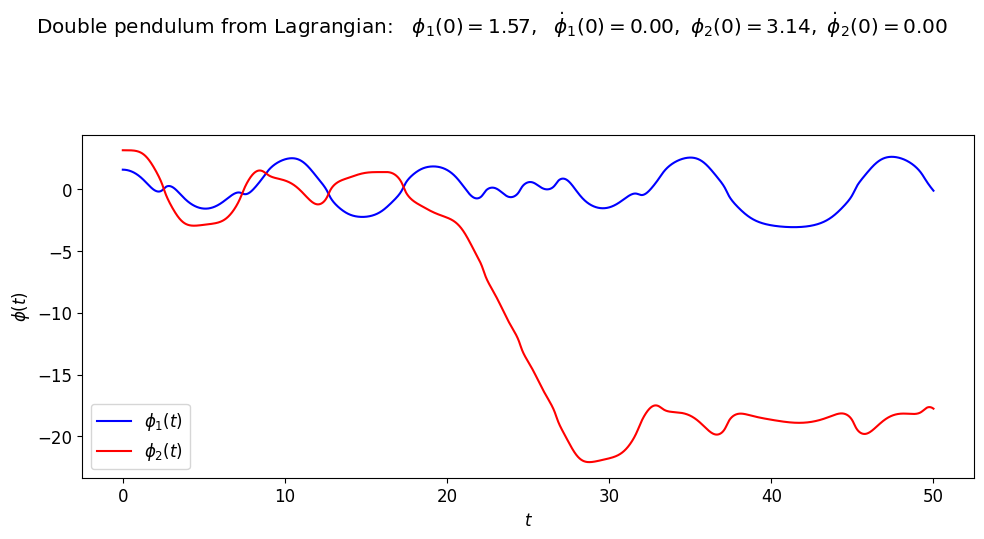

In [60]:
# both plots: same initial conditions
phi1_0 = np.pi/2
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.
phi1, phi1_dot, phi2, phi2_dot = double_p1.solve_ode(t_pts, phi1_0, phi1_dot_0,phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            color='red',
            label=r'$\phi_2(t)$', 
            ax=ax_a)    
fig.tight_layout()
fig.savefig('Double_pendulum_Lagrange1.png', bbox_inches='tight')  

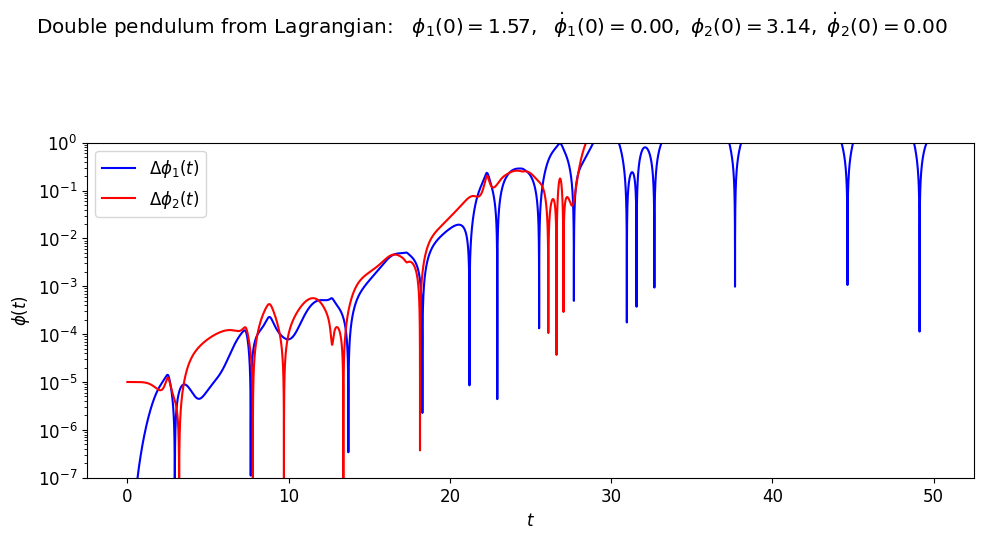

In [64]:
phi1b, phi1b_dot, phi2b, phi2b_dot = double_p1.solve_ode(t_pts, phi1_0, phi1_dot_0,phi2_0 - 0.00001, phi2_dot_0)
# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(phi1[start : stop] - phi1b[start : stop]), 
            axis_labels=phi_vs_time_labels,
            semilogy = True,
            color='blue',
            label=r'$\Delta\phi_1(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], np.abs(phi2[start : stop] - phi2b[start : stop]), 
            color='red',
            semilogy = True,
            label=r'$\Delta\phi_2(t)$', 
            ax=ax_a)    
ax_a.set_ylim(1e-7,1.)
fig.tight_layout()
fig.savefig('Double_pendulum_Lagrange2.png', bbox_inches='tight')  

# Now to animate

In [65]:
from matplotlib import animation, rc
from IPython.display import HTML